# Анализ пользовательского поведения клиентов мобильного приложения "Ненужные вещи"

**Презентация:** https://disk.yandex.ru/i/VTKgYQVCg-SrhA

**Цель:**\
Определить целевую аудиторию приложения и её особенности для дальнейшего использования в работе над приложением.\
Проверить гипотезы:
1. Пользователи, установившие приложение по ссылке из yandex, и пользовали, установившие приложение по ссылке из google, демонстрируют разную конверсию в целевое действие - просмотр контактов.
2. Среднее время утренней и вечерней сессий пользователей отличается.

**План работы (Декомпозиция):**
1. [Предобработка данных](#a)
* Изучить общую информацию о данных: пропуски, типы данных, названия столбцов.
* Найти и обработать пропуски в данных, если необходимо.
* Поменять типы данных, если необходимо.
* Проверить наличие явных и неявных дубликатов, обработать значения.
* Сформулировать вывод по предобработке данных.

2. Исследовательский анализ данных
* Определить [период представленных данных](#c).
* Исследовать данные, проверить на предмет аномалий и выбросов.
* Изучить общее поведение пользователей: [вычислить retention rate](#d) (по всем пользователям в датасете),[время проведенное в приложении](#e) (средняя продолжительность сессии, количество сессий на пользователя), [частоту сессий](#f) (среднее значение по дням недели, по времени суток), [общий показатель конверсии в целевое действие](#g).
* Сформулировать выводы по итогам исследовательского анализа данных.

3. Сегментация аудитории
* По итогам анализа определить подходящие для сегментации параметры и [выделить основные группы пользователей](#h).
* Вычислить [Retention rate по группам](#i).
* Определить [конверсию в целевое действие(показать контакты) для каждой из групп](#j).
* Вычислить [время в приложении в разбивке по группам](#k).
* Определить [частоту совершаемых для каждой из групп](#l).
* Проанализировать параметры, выделить целевую.


4. Проверка гипотез
* Провести статистический тест разницы конверсий пользователей из yandex и из google для проверки [гипотезы 1](#m). Выявить закономерности, описать результаты.
* Провести статистический тест разницы среднего времени утренней и вечерней сессий пользователей для проверки [гипотезы 2](#n). Выявить закономерности, описать результаты.

5. Общий вывод
* Перепроверить работоспособность кода.
* Сформулировать [общий вывод](#o).
* Подготовить презентацию по итогам исследования.

### Подготовка данных

In [252]:
#импорт библиотек 

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
from statsmodels.stats.proportion import proportions_ztest

In [253]:
#чтение файла mobile_sources

pth1 = '/datasets/mobile_sources.csv'
pth2 = os.path.abspath(pth1)

if os.path.exists(pth1):
    data_sources = pd.read_csv(pth1)
elif os.path.exists(pth2):
    data_sources = pd.read_csv(pth2)
else:
    print('Something is wrong')

In [254]:
#чтение файла mobile_dataset

pth3 = '/datasets/mobile_dataset.csv'
pth4 = os.path.abspath(pth3)

if os.path.exists(pth3):
    data = pd.read_csv(pth4)
elif os.path.exists(pth4):
    data = pd.read_csv(pth4)
else:
    print('Something is wrong')

In [255]:
data.head()

,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


In [256]:
data_sources.head()

,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


In [257]:
#функция для предобработки данных

def first_processing(df):
    info = df.info(),
    head = df.head(),
    duplicates=df.duplicated().sum(),
    df.columns = [x.lower() for x in df.columns]
    return info, print('Дубликатов -',duplicates), head

### Предобработка данных

<a id='a'></a>

#### Датасет mobile_dataset (data) 

* event.time — время совершения,
* user.id — идентификатор пользователя,
* event.name — действие пользователя.

*Виды действий:*
- advert_open — открыл карточки объявления,
- photos_show — просмотрел фотографий в объявлении,
- tips_show — увидел рекомендованные объявления,
- tips_click — кликнул по рекомендованному объявлению,
- contacts_show и show_contacts — посмотрел номер телефона,
- contacts_call — позвонил по номеру из объявления,
- map — открыл карту объявлений,
- search_1 — search_7 — разные действия, связанные с поиском по сайту,
- favorites_add — добавил объявление в избранное.

In [258]:
first_processing(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB
Дубликатов - (0,)


((None,),
 None,
 (                   event.time   event.name  \
  0  2019-10-07 00:00:00.431357  advert_open   
  1  2019-10-07 00:00:01.236320    tips_show   
  2  2019-10-07 00:00:02.245341    tips_show   
  3  2019-10-07 00:00:07.039334    tips_show   
  4  2019-10-07 00:00:56.319813  advert_open   
  
                                  user.id  
  0  020292ab-89bc-4156-9acf-68bc2783f894  
  1  020292ab-89bc-4156-9acf-68bc2783f894  
  2  cf7eda61-9349-469f-ac27-e5b6f5ec475c  
  3  020292ab-89bc-4156-9acf-68bc2783f894  
  4  cf7eda61-9349-469f-ac27-e5b6f5ec475c  ,))

In [259]:
#приведение названий столбцов к единому виду
data.columns = [x.replace('.', '_') for x in data.columns]

#приведение стобцов к нужному формату
data['event_time'] = pd.to_datetime(data['event_time'])

#добавление столбца с датой события
data['event_dt'] = data['event_time'].dt.date

In [260]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_time  74197 non-null  datetime64[ns]
 1   event_name  74197 non-null  object        
 2   user_id     74197 non-null  object        
 3   event_dt    74197 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 2.3+ MB


In [261]:
#приведение названий к одному виду
data['event_name']=data['event_name'].replace('contacts_show', 'show_contacts')

In [262]:
data['event_name'].value_counts()

tips_show        40055
photos_show      10012
advert_open       6164
show_contacts     4529
map               3881
search_1          3506
favorites_add     1417
search_5          1049
tips_click         814
search_4           701
contacts_call      541
search_3           522
search_6           460
search_2           324
search_7           222
Name: event_name, dtype: int64

In [263]:
data['user_id'].nunique()

4293

In [264]:
data.head()

,event_time,event_name,user_id,event_dt
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2019-10-07
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2019-10-07


**Выводы по предобработке data:**\
Data содержит данные о событиях, совершенных в мобильном приложении "Ненужные вещи": время, название, айди пользователя. Датафрейм содердит данные о 74 197 действиях для 4293 уникальных пользователей.\
Пропуски в датафрейме отсутствуют.\
Тип данных столбца event_time изменён на datetime. Также создан новый столбец event_dt, куда вынесена дата события.\
\
В датафрейме data автоматически обнаруженных дубликатов. Проверен на наличие неявных дубликатов столбец с текстовым типом данных event_name, найден дубликат названия ондого действия - показ контактов, приведено к единому названию "show_contacts".

#### Датасет mobile_sources (data_sources)

* userId — идентификатор пользователя,
* source — источник, с которого пользователь установил приложение.

In [265]:
first_processing(data_sources)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB
Дубликатов - (0,)


((None,),
 None,
 (                                 userId  source
  0  020292ab-89bc-4156-9acf-68bc2783f894   other
  1  cf7eda61-9349-469f-ac27-e5b6f5ec475c  yandex
  2  8c356c42-3ba9-4cb6-80b8-3f868d0192c3  yandex
  3  d9b06b47-0f36-419b-bbb0-3533e582a6cb   other
  4  f32e1e2a-3027-4693-b793-b7b3ff274439  google,))

In [266]:
#приведение названий столбцов к единому виду
data_sources.columns = ['user_id','source']

In [267]:
data_sources['source'].value_counts()

yandex    1934
other     1230
google    1129
Name: source, dtype: int64

**Выводы по предобработке data_sources:**\
Data_sources содержит данные об источниках перехода в мобильное приложение "Ненужные вещи" для каждого уникального пользователя(4293 строки по кол-ву пользователей): айди пользователя, источник перехода.\
Пропуски в датафрейме отсутствуют.\
Типы данных корректны.\
\
В датафрейме data_sources нет автоматически обнаруженных дубликатов. Проверен на наличие неявных дубликатов столбец с текстовым типом данных source, дубликатов не обнаружено.

#### Объединенный датасет agg_data

In [268]:
agg_data = data.merge(data_sources, on='user_id', how='left')

In [269]:
agg_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74197 entries, 0 to 74196
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_time  74197 non-null  datetime64[ns]
 1   event_name  74197 non-null  object        
 2   user_id     74197 non-null  object        
 3   event_dt    74197 non-null  object        
 4   source      74197 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 3.4+ MB


In [270]:
#сортировка по уникальному пользователю, дате
agg_data=agg_data.sort_values(['user_id', 'event_time']).reset_index(drop=True)

In [271]:
agg_data.head()

,event_time,event_name,user_id,event_dt,source
0,2019-10-07 13:39:45.989359,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other
1,2019-10-07 13:40:31.052909,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other
2,2019-10-07 13:41:05.722489,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other
3,2019-10-07 13:43:20.735461,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other
4,2019-10-07 13:45:30.917502,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other


**Выводы по общей таблице agg_data:**\
Объединенный датасет agg_data содержит 74 197 записей, каждая из которых описывает действие пользователя и источник перехода. Для каждой записи указаны время действия, название, ID пользователя, дата события и источник перехода.\
Пропуски в датафрейме отсутствуют, данные полные, вероятно заполнены автоматически, обеспечивают надежность анализа.\
Типы данных корректны, дубликаты отсутствуют.\
По результатам предобработки данные исходного датасета готовы для дальнейшего анализа и исследований.

### Исследовательский анализ данных

#### Временной период данных

<a id='c'></a>

In [272]:
#проверка периода данных
print('Начало периода:',agg_data['event_dt'].min())
print('Конец периода:',agg_data['event_dt'].max())

Начало периода: 2019-10-07
Конец периода: 2019-11-03


**Вывод:** Анализируемый период данных составляет 28 дней с 7 октября по 3 ноября 2019 года.

#### Анализ событий

##### Распределение частоты событий во времени

In [273]:
#частота событий по дате
event_plot=agg_data.groupby('event_dt')['event_name'].count().reset_index()

In [274]:
event_plot.head()

,event_dt,event_name
0,2019-10-07,2545
1,2019-10-08,2499
2,2019-10-09,2027
3,2019-10-10,2243
4,2019-10-11,2030


In [275]:
event_plot.describe()

,event_name
count,28.000000
mean,2649.892857
std,408.950358
min,1843.000000
25%,2457.000000
50%,2725.000000
75%,2884.750000
max,3361.000000


In [276]:
event_plot[ '7day_rolling_avg' ] = event_plot.event_name.rolling(7).mean() 

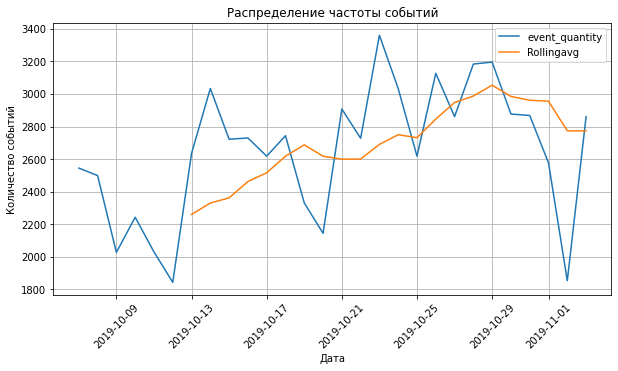

In [277]:
plt.figure(figsize = (10,5))
sns.lineplot(x='event_dt', y='event_name', data=event_plot, label='event_quantity')
#скользящее среднее по 7-ми дням
sns.lineplot( x = 'event_dt', 
             y = '7day_rolling_avg', 
             data = event_plot, 
             label = 'Rollingavg') 
plt.grid()
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Количество событий')
plt.title('Распределение частоты событий')
plt.show()

*Вывод по графику:* График частоты событий по дате не очень стабильный, колеблется от ~1800 до ~3400.\
Самые низкие значения (резкий спад) 12 октября, 20 октября и 2 ноября 2019 года.\
Самое высокое значение 23 октября 2019 года.
Скользящее среднее по 7 дням указывает на основную тенденцию в данных - постепенный рост, пиковое значение - конец октября, затем плавный небольшой спад.

**Вывод:** Количество совершенных пользователями событий колеблется от ~1800 до ~3400 событий за день. Показатели не очень стабильные.\
Аномально низких или высоких значений при этом за заявленный период не обнаружено, медианное значение ~2700 событий в день.\
\
Реже всего события совершались пользователями 12 октября и 2 ноября 2019 года (субботы), а также 20 октября (воскресенье), возможно такие спады были связаны с техническими работами в приложении - после резких падений каждый раз был достаточно резкий подъем.\
Самое высокое значение 23 октября 2019 года (среда).\
Основная тенденция в данных - плавный рост, пиковое значение - конец октября, затем плавный незначительный спад.

##### Распределение типов событий по их количеству

In [278]:
#категории событий по количеству событий
event_cat = agg_data['event_name'].value_counts().reset_index()

In [279]:
event_cat

,index,event_name
0,tips_show,40055
1,photos_show,10012
2,advert_open,6164
3,show_contacts,4529
4,map,3881
5,search_1,3506
6,favorites_add,1417
7,search_5,1049
8,tips_click,814
9,search_4,701


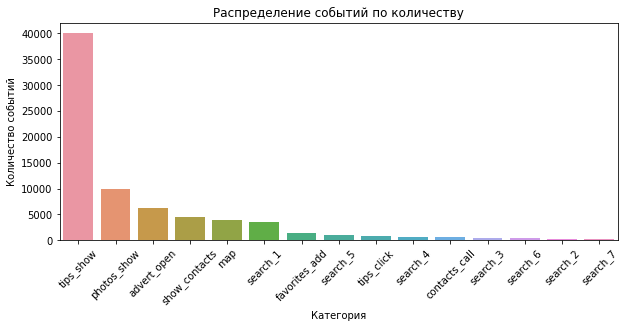

In [280]:
plt.figure(figsize = (10,4))
sns.barplot(x='index', y='event_name', data=event_cat)
plt.xticks(rotation=45)
plt.xlabel('Категория')
plt.ylabel('Количество событий')
plt.title('Распределение событий по количеству')
plt.show()

*Вывод по графику:* Согласно графику распределения событий по их количеству наиболее популярное событие tips_show - просмотр рекомендованных объявлений.\
Остальные типы событий выполняются пользователями сильно реже.\ 
Целевое действие - show_contacts на 4 месте (около 4500 событий выполнено за рассматриваемый период.\
Наименее популярные действия  - вариации search (6,2 и 7), а также действие contacts_call.

In [281]:
#добавляем день недели действия
agg_data['weekday']=agg_data['event_time'].dt.weekday

In [282]:
#частота событий по дате
event_dynamics=agg_data.pivot_table(index = 'weekday',
                                    values='event_name',
                                    aggfunc='count')

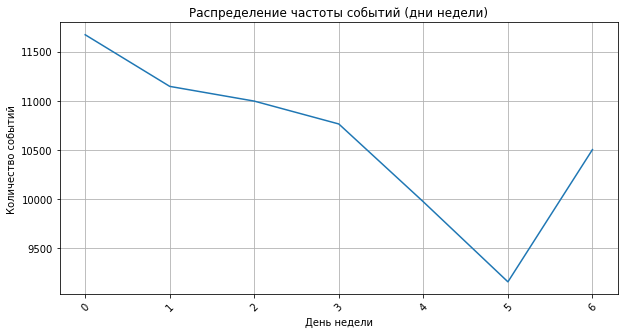

In [283]:
plt.figure(figsize = (10,5))
sns.lineplot(x='weekday', y='event_name', data=event_dynamics) 
plt.grid()
plt.xticks(rotation=45)
plt.xlabel('День недели')
plt.ylabel('Количество событий')
plt.title('Распределение частоты событий (дни недели)')
plt.show()

*Вывод по графику:* Согласно графику распределения частоты событий по дням недели пользователи активнее всего используют приложение в понедельник. Наиболее популярный период с понедельника по среду.\
Суббота - самый неактивный по количеству действий день.\
В целом, с начала недели до субботы активность плавно снижается, в воскресенье снова заметен рост.

**Вывод:** Количество совершенных пользователями событий по категориям колеблется от ~200 до ~40 000 событий за все 28 рассматриваемых дней.\
Согласно графику распределения событий по их количеству, наиболее популярное — просмотр рекомендованных объявлений. Пользователи активно интересуются предложенными объявлениями и просматривают их. Основная функция приложения.\
\
Целевое действие show_contacts было выполнено около 4500 раз.\
\
Наименее популярными действиями являются вариации search (6, 2 и 7), а также действие contacts_call. Вероятно пользователи предпочитают просматривать объявления без поиска конкретных товаров, для более подробного анализа необходимо узнать об отличиях функционала подгрупп search. Также необходимо обратить внимание на реализацию функционала contacts call, возможно пользователи предпочитают связываться с продавцами через другие каналы коммуникации.
\
Самая слабая активность по количеству действий пользователей наблюдается в субботу, также низкие показатели у пятницы. Начало недели - более высокая активность.

#### Анализ сессий

<a id='f'></a>

In [284]:
#разница между событиями по каждому пользователю
difference=agg_data.groupby('user_id')['event_time'].diff()
difference.describe()

count                        69904
mean     0 days 03:53:01.169952121
std      1 days 01:32:57.259354294
min         0 days 00:00:00.000001
25%      0 days 00:00:23.594245250
50%         0 days 00:01:10.535313
75%      0 days 00:03:00.300498750
max        26 days 13:49:54.853516
Name: event_time, dtype: object

In [285]:
#создание разделителя сессий, таймаут - 45 минут
g = (difference > pd.Timedelta('45Min')).cumsum()

In [286]:
#добавление номера каждой сессии
agg_data['session_id'] = agg_data.groupby(['user_id', g], sort=False).ngroup() + 1

In [287]:
agg_data.head()

,event_time,event_name,user_id,event_dt,source,weekday,session_id
0,2019-10-07 13:39:45.989359,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other,0,1
1,2019-10-07 13:40:31.052909,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other,0,1
2,2019-10-07 13:41:05.722489,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other,0,1
3,2019-10-07 13:43:20.735461,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other,0,1
4,2019-10-07 13:45:30.917502,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other,0,1


In [288]:
#создание датасета с инфо о сессиях
sessions =  agg_data.groupby(['user_id', 'session_id']).agg({'event_time':['first', 'last'], 
                                                                  'event_name':'count',
                                                            'source':'first'}).reset_index()

In [289]:
# добавление столбца с временем первого события
first_ts = agg_data.groupby(['user_id'])['event_time'].min()
first_ts.name = 'first_ts'
sessions = sessions.join(first_ts,on='user_id')

/opt/conda/lib/python3.9/site-packages/pandas/core/reshape/merge.py:648: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


In [290]:
sessions.columns = ['user_id', 'session_id', 'session_start', 'session_end', 'event_count', 'source','first_event']

In [291]:
# создание столбцев с лайфтаймом пользователей, датой первого события, длительностью каждой сессии
sessions['lifetime'] = (sessions['session_start'] - sessions['first_event']).dt.days
sessions['first_dt'] = sessions['first_event'].dt.date
sessions['duration'] = (sessions['session_end'] - sessions['session_start']).dt.total_seconds()
sessions['start_dt'] = sessions['session_start'].dt.date

In [292]:
sessions.head()

,user_id,session_id,session_start,session_end,event_count,source,first_event,lifetime,first_dt,duration,start_dt
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,2019-10-07 13:39:45.989359,2019-10-07 13:49:41.716617,9,other,2019-10-07 13:39:45.989359,0,2019-10-07,595.727258,2019-10-07
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2,2019-10-09 18:33:55.577963,2019-10-09 18:42:22.963948,4,other,2019-10-07 13:39:45.989359,2,2019-10-07,507.385985,2019-10-09
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,3,2019-10-21 19:52:30.778932,2019-10-21 20:07:30.051028,14,other,2019-10-07 13:39:45.989359,14,2019-10-07,899.272096,2019-10-21
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,4,2019-10-22 11:18:14.635436,2019-10-22 11:30:52.807203,8,other,2019-10-07 13:39:45.989359,14,2019-10-07,758.171767,2019-10-22
4,00157779-810c-4498-9e05-a1e9e3cedf93,5,2019-10-19 21:34:33.849769,2019-10-19 21:59:54.637098,9,yandex,2019-10-19 21:34:33.849769,0,2019-10-19,1520.787329,2019-10-19


In [293]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9895 entries, 0 to 9894
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   user_id        9895 non-null   object        
 1   session_id     9895 non-null   int64         
 2   session_start  9895 non-null   datetime64[ns]
 3   session_end    9895 non-null   datetime64[ns]
 4   event_count    9895 non-null   int64         
 5   source         9895 non-null   object        
 6   first_event    9895 non-null   datetime64[ns]
 7   lifetime       9895 non-null   int64         
 8   first_dt       9895 non-null   object        
 9   duration       9895 non-null   float64       
 10  start_dt       9895 non-null   object        
dtypes: datetime64[ns](3), float64(1), int64(3), object(4)
memory usage: 850.5+ KB


In [294]:
'Общее количество сессий:', sessions['session_id'].max()

('Общее количество сессий:', 9895)

##### Распределение продолжительности сессий

In [295]:
session_plot=sessions.groupby('start_dt')['session_id'].count().reset_index()

In [296]:
session_plot[ '7day_rolling_avg' ] = session_plot.session_id.rolling(7).mean() 

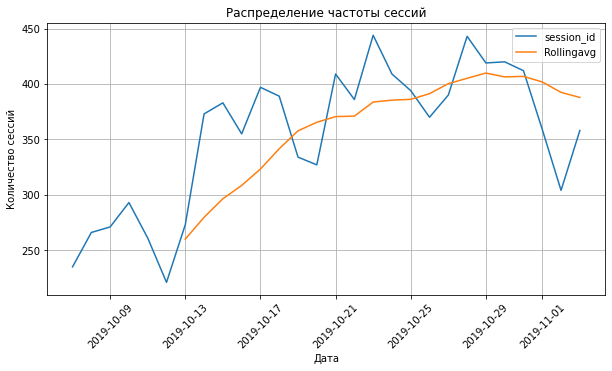

In [297]:
plt.figure(figsize = (10,5))
plt.plot('start_dt', 'session_id', data=session_plot)
#скользящее среднее по 7-ми дням
sns.lineplot( x = 'start_dt', 
             y = '7day_rolling_avg', 
             data = session_plot, 
             label = 'Rollingavg') 
plt.grid()
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Количество сессий')
plt.title('Распределение частоты сессий')
plt.show()

*Вывод по графику:* График распределения частоты сессий не очень стабилен, однако, наблюдается тенденция роста. Больше всего сессий с 14 октября по 31 октября 2019 года.\
Самый резкий спад наблюдался 12 октября (суббота) , однако, за ним последовал резкий подъем.

In [298]:
sessions['duration'].describe()

count     9895.000000
mean       915.072332
std       1453.688023
min          0.000000
25%         35.496321
50%        376.138302
75%       1198.481657
max      22055.837396
Name: duration, dtype: float64

In [299]:
'Среднее время сессии:',round(sessions['duration'].mean()),'секунд'

('Среднее время сессии:', 915, 'секунд')

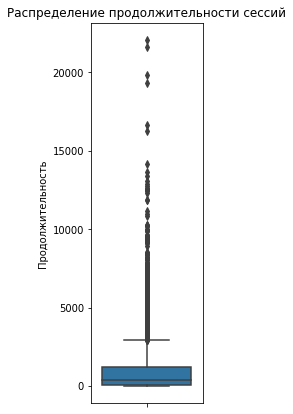

In [300]:
plt.figure(figsize=(2,7))
sns.boxplot(y='duration', data=sessions) 
plt.title("Распределение продолжительности сессий")
plt.ylabel("Продолжительность")
plt.show()

*Вывод по графику:* График распределения значений продолжительности сессий указывает на наличие большого количество аномально высоких значений. Пределы значений от 0 до 22 000 секунд (около 6 часов).\
Основные значения варьируются примерно от 30 секунд до 1200 секунд (20 минут).\
Медианное значение - 376 секунд (6 минут). Среднее - 915 секунд (15 минут).

In [301]:
#количество сессий и среднее количество действий за 1 сессию на пользователя
sessions_stat = sessions.groupby('user_id').agg({'session_id' : 'nunique', 'event_count':'mean'}).reset_index()

In [302]:
print('Среднее кол-во сессий на пользователя:', round(sessions_stat['session_id'].mean(),1))
'Среднее кол-во событий на сессию:', round(sessions_stat['event_count'].mean(),1)

Среднее кол-во сессий на пользователя: 2.3


('Среднее кол-во событий на сессию:', 8.6)

In [303]:
#добавление столбца с днем недели
sessions['weekday']=sessions['session_start'].dt.weekday

In [304]:
'Среднее время сессии в выходные:',round(sessions[sessions['weekday']>5]['duration'].mean(),2),'секунд'

('Среднее время сессии в выходные:', 993.26, 'секунд')

In [305]:
'Среднее время сессии в будни:', round(sessions[sessions['weekday']<6]['duration'].mean(),2),'секунд'

('Среднее время сессии в будни:', 902.74, 'секунд')

In [306]:
#кол-во сессий на пользователя и действий за сессию в выходные
sessions[sessions['weekday']>5].groupby('user_id').agg({'session_id' : 'nunique', 
                                                        'event_count':'mean'}).reset_index().mean()

session_id     1.396891
event_count    8.184720
dtype: float64

In [307]:
#кол-во сессий на пользователя и действий за сессию в будни
sessions[sessions['weekday']<6].groupby('user_id').agg({'session_id' : 'nunique', 
                                                        'event_count':'mean'}).reset_index().mean()

session_id     2.208527
event_count    8.451170
dtype: float64

In [308]:
#функция для определения времени суток
def get_time_segment(row):
    time_str = row.time()
    if time_str.hour >= 6 and time_str.hour < 12:
        return 'morning'
    elif time_str.hour >= 12 and time_str.hour < 18:
        return 'day'
    elif time_str.hour >= 18 and time_str.hour <= 22:
        return 'evening'
    else:
        return 'night'

In [309]:
sessions['time_segment'] = sessions['session_start'].apply(get_time_segment)

In [310]:
sessions.head()

,user_id,session_id,session_start,session_end,event_count,source,first_event,lifetime,first_dt,duration,start_dt,weekday,time_segment
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,2019-10-07 13:39:45.989359,2019-10-07 13:49:41.716617,9,other,2019-10-07 13:39:45.989359,0,2019-10-07,595.727258,2019-10-07,0,day
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2,2019-10-09 18:33:55.577963,2019-10-09 18:42:22.963948,4,other,2019-10-07 13:39:45.989359,2,2019-10-07,507.385985,2019-10-09,2,evening
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,3,2019-10-21 19:52:30.778932,2019-10-21 20:07:30.051028,14,other,2019-10-07 13:39:45.989359,14,2019-10-07,899.272096,2019-10-21,0,evening
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,4,2019-10-22 11:18:14.635436,2019-10-22 11:30:52.807203,8,other,2019-10-07 13:39:45.989359,14,2019-10-07,758.171767,2019-10-22,1,morning
4,00157779-810c-4498-9e05-a1e9e3cedf93,5,2019-10-19 21:34:33.849769,2019-10-19 21:59:54.637098,9,yandex,2019-10-19 21:34:33.849769,0,2019-10-19,1520.787329,2019-10-19,5,evening


In [311]:
#сводная таблица отличий сессий по времени суток
session_time_segment = sessions.groupby('time_segment').agg({'session_id' : 'count', 'event_count':'mean', 
                                      'duration':'mean'}).reset_index().sort_values('session_id', ascending = False)

In [312]:
session_time_segment

,time_segment,session_id,event_count,duration
0,day,3904,7.511014,926.813939
1,evening,3037,7.621995,901.501583
2,morning,2147,7.483465,950.535401
3,night,807,7.012392,814.992931


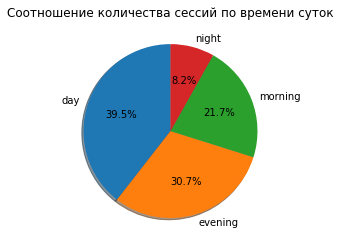

In [313]:
fig, ax = plt.subplots()
ax.pie(session_time_segment['session_id'], labels=session_time_segment['time_segment'], autopct='%1.1f%%',
       shadow=True, startangle=90)
plt.title('Соотношение количества сессий по времени суток')
plt.show()

*Вывод по графику:* Согласно графику соотношения количества сессий по времени суток чаще всего пользователи предпочитают дневное время для пользования приложением (с 12 до 18 вечера). Вечернее время (с 18 до 22) также популярно.\
Самое непопулярное по количеству сессий время - ночь (с 22 до 6 утра).

**Вывод:** Анализ данных о продолжительности сессий пользователей приложения показывает, что существует большое количество аномально высоких значений.Основные значения продолжительности сессий варьируются от 30 секунд до 20 минут. Медианное значение составляет 6 минут, а среднее — около 15 минут.\
\
Среднее количество сессий на пользователя составляет примерно 2,3, что указывает на то, что пользователи по большей части возвращаются в приложение. Среднее количество событий на сессию — 8,6, пользователи заинтересованы в функционале приложения.\
\
Также было проанализировано распределение сессий по времени суток. Выяснилось, что чаще всего пользователи предпочитают пользоваться приложением днём и вечером, тогда как ночью активность логично снижается. При этом в среднем количестве действий и продолжительности сессии различия незначительные.

##### Нулевые сессии

In [314]:
#количество нулевых сессий
sessions['null'] = sessions['duration'].apply(lambda x: True if x == 0 else False)
null_sessions = sessions.query('null == True')

In [315]:
'Количество нулевых сессий', len(null_sessions),  f'{len(null_sessions)/ len(sessions):.2%}' ' от общего кол-ва сессий'

('Количество нулевых сессий', 1869, '18.89% от общего кол-ва сессий')

In [316]:
null_sessions['session_dt']=null_sessions['session_start'].dt.date
null_plot=null_sessions.groupby('session_dt')['session_id'].count().reset_index()

/tmp/ipykernel_31/837160942.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_sessions['session_dt']=null_sessions['session_start'].dt.date


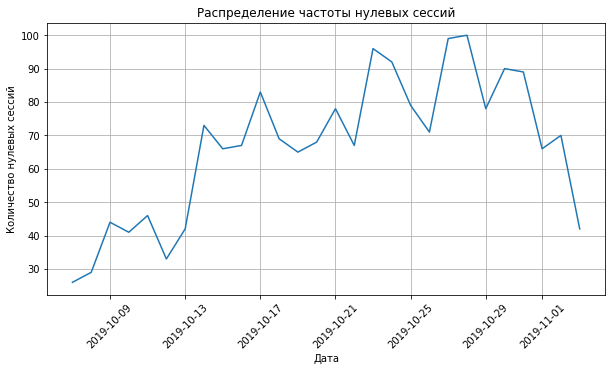

In [317]:
plt.figure(figsize = (10,5))
plt.plot('session_dt', 'session_id', data=null_plot)
plt.grid()
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Количество нулевых сессий')
plt.title('Распределение частоты нулевых сессий')
plt.show()

*Вывод по графику:* График распределения частоты нулевых сессий не стабилен, однако, наблюдается тенденция роста. Больше всего нулевых сессий (от 65 до 100 в день) наблюдается с 14 октября по 1 ноября 2019 года.\
С 31 октября частота постепенно снижается.

In [318]:
#частота событий нулевых сессий
null_cat = agg_data.query('session_id.isin(@null_sessions["session_id"])')['event_name'].value_counts().reset_index()
null_cat = null_cat.merge(event_cat, on='index', how='left')
null_cat['percent']= round(null_cat['event_name_x']/null_cat['event_name_y'],3)*100

In [319]:
null_cat.sort_values(by='percent', ascending=False)

,index,event_name_x,event_name_y,percent
2,search_1,322,3506,9.2
1,photos_show,457,10012,4.6
3,show_contacts,113,4529,2.5
4,map,90,3881,2.3
7,search_5,23,1049,2.2
0,tips_show,777,40055,1.9
6,favorites_add,27,1417,1.9
11,search_7,3,222,1.4
8,tips_click,8,814,1.0
9,search_3,5,522,1.0


**Вывод:** Анализ данных о количестве и распределении нулевых сессий показывает, что они составляют примерно 19 % от общего количества сессий. График распределения частоты нулевых сессий не стабилен, однако наблюдается тенденция роста. Больше всего нулевых сессий (от 65 до 100 в день) наблюдалось с 14 октября по 1 ноября 2019 года. С 31 октября частота постепенно снижается. Результаты могут быть связаны с различными факторами, такими как технические проблемы в эти даты. Важно отметить, что с 13го по 31 октября также наблюдается рост количества сессий в целом.\
\
Больше всего нулевых сессий происходит при выполнении действий search_1 и photos_show. Вероятно пользователи иногда выполняют эти действия без достижения целевого результата (отсутствуют результаты по введенному поисковому запросу, фотографии товара). Возможно данные типы событий также имеют некоторые недостатки в реализации.

#### Анализ профилей

##### Создание профилей пользователей

In [320]:
#создание датасета с профилями пользователей
profiles = sessions.groupby('user_id').agg({'session_id' : 'count', 
                                                  'duration':'sum', 
                                                  'event_count':'mean',
                                            'first_event':'first',
                                            'first_dt':'first'}).reset_index()
profiles = profiles.merge(data_sources, on='user_id', how='left')

In [321]:
#проверка выполнения целевого действия - показ контактов
for event in agg_data['event_name'].unique():
    if event == 'show_contacts':
        event_user = agg_data[agg_data['event_name'] == event]['user_id'].unique()
        profiles['target'] = profiles['user_id'].isin(event_user)

In [322]:
profiles.head()

,user_id,session_id,duration,event_count,first_event,first_dt,source,target
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,4,2760.557106,8.750000,2019-10-07 13:39:45.989359,2019-10-07,other,False
1,00157779-810c-4498-9e05-a1e9e3cedf93,6,11774.208630,11.833333,2019-10-19 21:34:33.849769,2019-10-19,yandex,True
2,00463033-5717-4bf1-91b4-09183923b9df,1,1482.475025,10.000000,2019-11-01 13:54:35.385028,2019-11-01,yandex,False
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,6,6644.358600,5.333333,2019-10-18 22:14:05.555052,2019-10-18,google,False
4,00551e79-152e-4441-9cf7-565d7eb04090,3,559.664543,2.666667,2019-10-25 16:44:41.263364,2019-10-25,yandex,True


##### Распределение пользователей по времени в приложении

<a id='e'></a>

In [323]:
# распределение суммарного времени в приложении пользователя
profiles['duration'].describe()

count      4293.000000
mean       2109.163924
std        4451.692354
min           0.000000
25%         376.441646
50%         965.556677
75%        2295.057229
max      123351.885362
Name: duration, dtype: float64

In [324]:
# распределение суммарного времени в приложении пользователя совершившего целевое действие
profiles[profiles['target']==True]['duration'].describe()

count       981.000000
mean       3749.016838
std        7841.242424
min           0.000000
25%         567.837834
50%        1584.167871
75%        3691.755501
max      123351.885362
Name: duration, dtype: float64

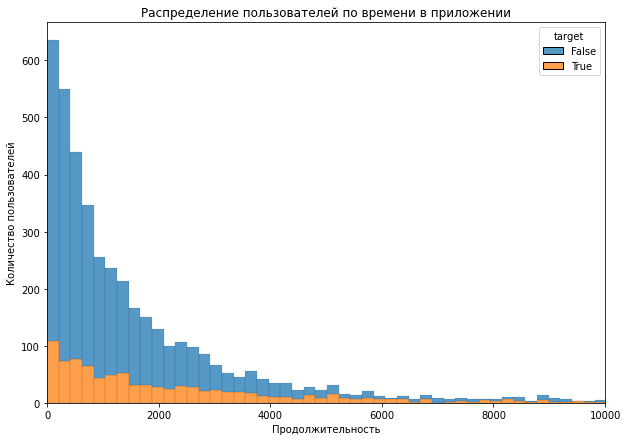

In [325]:
plt.figure(figsize = (10,7))
sns.histplot(x='duration', data=profiles, hue= 'target', multiple='stack', bins=590)
plt.xlabel('Продолжительность')
plt.ylabel('Количество пользователей')
plt.title('Распределение пользователей по времени в приложении')
plt.xlim(0,10000)
plt.show()

*Вывод по графику:* Согласно графику распределения пользователей по общему времени в приложении, основная часть проводит в приложении до 3000 секунд (50 минут). Однако, в данных много аномально высоких значений - до 123 351 (более 34 часов). Среднее суммарное время - 2109 секунд (35 минут), медианное - 965 секунд (16 минут).\
Пользватели совершившие целевое действие в среднем провдят в приложении больше времени.

##### Распределение пользователей по параметрам сессий

In [326]:
#распределение количества сессий на пользователя
profiles['session_id'].describe()

count    4293.000000
mean        2.304915
std         3.271779
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        91.000000
Name: session_id, dtype: float64

In [327]:
# распределение суммарного времени в приложении пользователя совершившего целевое действие
profiles[profiles['target']==True]['session_id'].describe()

count    981.000000
mean       3.664628
std        5.486594
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       91.000000
Name: session_id, dtype: float64

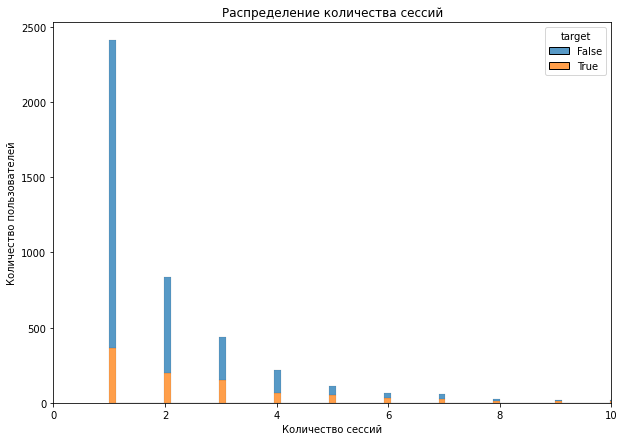

In [328]:
plt.figure(figsize = (10,7))
sns.histplot(x='session_id', data=profiles, hue= 'target', multiple='stack')
plt.xlabel('Количество сессий')
plt.ylabel('Количество пользователей')
plt.title('Распределение количества сессий')
plt.xlim(0,10)
plt.show()

*Вывод по графику:* График распределения количества сессий также имеет выбросы (до 91 сессии на пользователя).\
 Больше всего пользователей совершает до 3-х сессий (чаще всего 1), пользователи совершвшие целевое действие, в среднем показывают лучшие результаты (на 1 сессию больше по средним и медианным показателям).

In [329]:
#распределение среднего количества событий в сессии на пользователя
profiles['event_count'].describe()

count    4293.000000
mean        8.618507
std         8.875880
min         1.000000
25%         4.000000
50%         6.000000
75%        10.000000
max       104.000000
Name: event_count, dtype: float64

In [330]:
#распределение среднего количества событий в сессии на пользователя совершившего целевое действие
profiles[profiles['target']==True]['event_count'].describe()

count    981.000000
mean       8.856391
std        9.428655
min        1.000000
25%        3.600000
50%        6.000000
75%       11.000000
max      104.000000
Name: event_count, dtype: float64

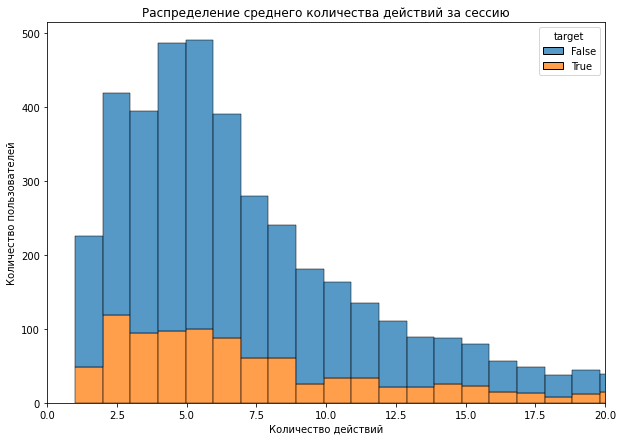

In [331]:
plt.figure(figsize = (10,7))
sns.histplot(x='event_count', data=profiles, hue= 'target', multiple='stack', bins=104)
plt.xlabel('Количество действий')
plt.ylabel('Количество пользователей')
plt.title('Распределение среднего количества действий за сессию')
plt.xlim(0,20)
plt.show()

*Вывод по графику:* График распределения среднего количества действий за сессию показывает, что в среднем пользователями (и целевыми и нет) совершается 6-8 действий за сессию. Основное количество пользователей совершает до 10-11 действий,хотя присутствуют и аномально высокие значения - 104 действия за сессию.

**Вывод:** Анализ данных раздела показывает, что большинство пользователей проводят в приложении не слишком много времени — до 50 минут. Однако есть и пользователи, которые находятся в приложении значительно дольше: максимальное время составило более 34 часов. Такая весомая разница может быть связана с быстрым и понятным функционалом приложения: клиент быстро находит нужный товар и связывается с продавцом, или напротив не очень привлекательным/удобным функционалом.\
Среднее суммарное время, проведённое пользователями в приложении, составляет около 35 минут, а медианное — примерно 16 минут. Пользователи, совершившие целевое действие хотя бы раз, в среднем проводят в приложении больше времени.\
\
Количество сессий также варьируется: некоторые пользователи заходят в приложение несколько раз, тогда как другие ограничиваются одним посещением. Максимальное количество сессий на одного пользователя составило 91. Пользователи, совершившие целевое действие, показывают лучшие результаты по количеству сессий. В среднем они совершают на одну сессию больше, чем остальные. Вероятно удачный опыт покупки мотивирует к использованию.\
\
За одну сессию пользователи совершают от 6 до 8 действий. Основное количество пользователей совершает до 10–11 действий, но есть и аномально высокие значения — 104 действия за сессию.

#### Расчет Retention Rate

<a id='d'></a>

In [332]:
#функция для подсчета удержания
def get_retention(
    profiles, sessions, observation_date, horizon_days, dimensions=[], ignore_horizon=False
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('first_dt <= @last_suitable_acquisition_date')

    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_event']
    ).dt.days

    result_grouped = result_raw.pivot_table(
        index=dimensions, columns='lifetime', values='user_id', aggfunc='nunique'
    )
    cohort_sizes = (
        result_raw.groupby(dimensions)
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'cohort_size'})
    )
    result_grouped = cohort_sizes.merge(
        result_grouped, on=dimensions, how='left'
    ).fillna(0)
    result_grouped = result_grouped.div(result_grouped['cohort_size'], axis=0)

    result_grouped = result_grouped[
        ['cohort_size'] + list(range(horizon_days))
    ]

    result_grouped['cohort_size'] = cohort_sizes

    return result_raw, result_grouped   

In [333]:
#общий коэффициент удержания по дню первого события 
retention_raw, retention = get_retention(
    profiles, sessions, datetime(2019, 11, 4).date() , 7, dimensions=['first_dt'])

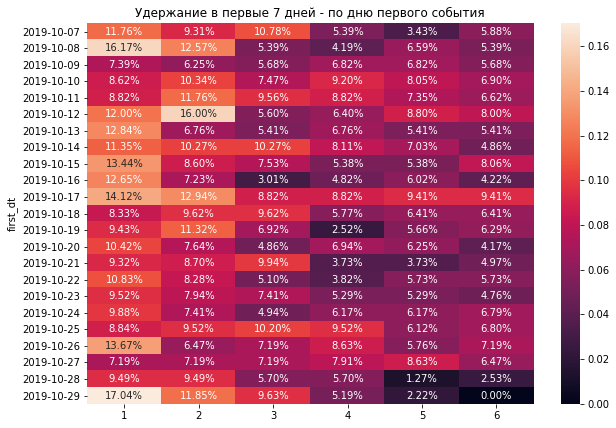

In [334]:
plt.figure(figsize=(10, 7)) 
sns.heatmap(retention.drop(columns=['cohort_size', 0]), annot=True,   fmt='.2%')
plt.title('Удержание в первые 7 дней - по дню первого события')  
plt.show()

*Вывод по графику:* График удержания по дню первого события не показывает конкретных закономерностей, неделя с 12 по 17 октября показывает хорошую возвращаемость (особенно 17го).

In [335]:
#общий коэффициент удержания по выполнению целевого действия 
retention_raw_t, retention_t = get_retention(
    profiles, sessions, datetime(2019, 11, 4).date() , 7, dimensions=['target'])

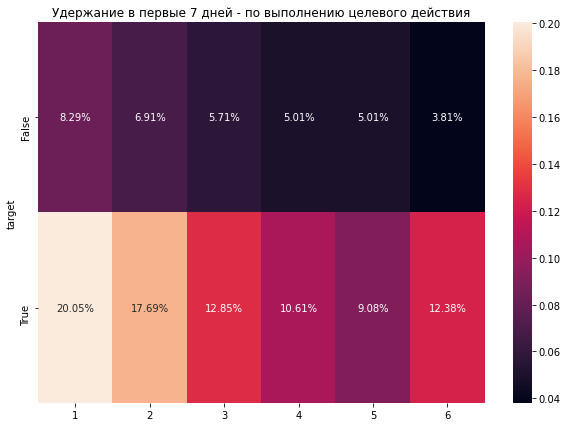

In [336]:
plt.figure(figsize=(10, 7)) 
sns.heatmap(retention_t.drop(columns=['cohort_size', 0]), annot=True,   fmt='.2%')
plt.title('Удержание в первые 7 дней - по выполнению целевого действия')  
plt.show()

*Вывод по графику:* Пользователи совершившие целевое действие гораздо охотнее возвращаются в приложение. Еще один довод в пользу успешной сделки как мотивации к дальнейшему использованию.

**Вывод:** Анализ графика удержания по дню первого события не позволяет выявить конкретных закономерностей. Однако можно отметить, что в период с 12 по 17 октября наблюдается неплохая возвращаемость пользователей, особенно 17-го числа.\
\
Пользователи, совершившие целевое действие, гораздо охотнее возвращаются в приложение. Успешная сделка может служить мотивацией к дальнейшему использованию приложения.\

#### Расчет Conversion Rate

<a id='g'></a>

In [337]:
#функция для расчета конверсии
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('first_dt <= @last_suitable_acquisition_date')

    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_time'])
        .groupby('user_id')
        .agg({'event_time': 'first'})
        .reset_index()
    )

    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_time']], on='user_id', how='left'
    )

    result_raw['lifetime'] = (
        result_raw['event_time'] - result_raw['first_event']
    ).dt.days

    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    if 'cohort' in dimensions: 
        dimensions = []

    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['first_dt'], horizon_days
    )

    return result_raw, result_grouped, result_in_time

In [338]:
'Количество уникальных пользователей, совершивших целевое действие: ', profiles.target.sum()

('Количество уникальных пользователей, совершивших целевое действие: ', 981)

In [339]:
f'Процент уникальных пользователей, совершивших целевое действие: {profiles.target.sum() / len(profiles):.2%}'

'Процент уникальных пользователей, совершивших целевое действие: 22.85%'

In [340]:
#информация по пользователям совершившим целевое действие
conv_data = agg_data.query('event_name == "show_contacts"')

In [341]:
#добавление времени суток первого действия пользователя
profiles['time_segment']=profiles['first_event'].apply(get_time_segment)

In [342]:
profiles.head()

,user_id,session_id,duration,event_count,first_event,first_dt,source,target,time_segment
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,4,2760.557106,8.750000,2019-10-07 13:39:45.989359,2019-10-07,other,False,day
1,00157779-810c-4498-9e05-a1e9e3cedf93,6,11774.208630,11.833333,2019-10-19 21:34:33.849769,2019-10-19,yandex,True,evening
2,00463033-5717-4bf1-91b4-09183923b9df,1,1482.475025,10.000000,2019-11-01 13:54:35.385028,2019-11-01,yandex,False,day
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,6,6644.358600,5.333333,2019-10-18 22:14:05.555052,2019-10-18,google,False,evening
4,00551e79-152e-4441-9cf7-565d7eb04090,3,559.664543,2.666667,2019-10-25 16:44:41.263364,2019-10-25,yandex,True,day


In [343]:
#общая конверсия
conv_raw, conversion, conv_in_time=get_conversion(
    profiles, conv_data, datetime(2019, 11, 4).date() , 7)

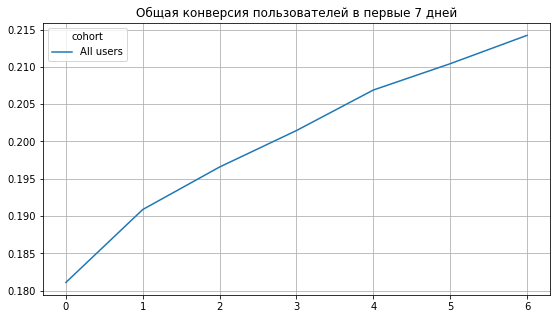

In [344]:
plt.figure(figsize=(20, 5))
report = conversion.drop(columns=['cohort_size'])
report.T.plot(
    grid=True, xticks=list(report.columns.values), ax=plt.subplot(1, 2, 1)
)
plt.title('Общая конверсия пользователей в первые 7 дней')

plt.show()

*Вывод по графику:* Более 20% пользователей конвертируются, заметен рост.

**Вывод:** Общая конверсия по 7-ми дням около 19-20 процентов. Для более точной оценки эффективности необходим дополнительный анализ доп. факторов: стоимость привлечения клиента, средний чек и другие метрики.

### Сегментация аудитории

#### Деление уникальных пользователей по группам

<a id='h'></a>

In [345]:
#расчет гомогенности сегментации
segments=profiles.groupby('source')['user_id'].nunique().reset_index()
segments['percent']=round(segments['user_id']/len(profiles),2)*100

In [346]:
segments.head()

,source,user_id,percent
0,google,1129,26.0
1,other,1230,29.0
2,yandex,1934,45.0


**Вывод. Сегментация:**\
Была выбрана сегментация пользователей по источнику перехода в приложение. Такой выбор может быть полезен по ряду причин:
1. Такое разделение позволяет определить наиболее эффективные источники переходов с точки зрения привлечения потенциальных пользователей: покупателей и продавцов. Результаты анализа групп могут помочь в оптимизации маркетинговых стратегий и бюджетов.
2. Сегментация по источникам переходов даёт возможность изучить предпочтения и поведение пользователей: узнать, какие типы объявлений больше всего привлекают пользователей. Дальнейший анализ может позволить проанализировать параметры размещения рекламы на конкретных целевых источниках, создавать персонализированные рекламные кампании в зависимости от потребностей продукта. 
3. Анализ источников переходов может быть полезен при адаптации рекламного контента и контента приложения под разные аудитории, учитывать визуальные особенности поисковой выдачи.

Ожидаемые результаты:
* Конверсия, среднее время и частота действий возможно будет выше выше у пользователей, чей источник перехода Яндекс или Google. Эти поисковые системы чаще используются для поиска конкретных продуктов или сервисов, поэтому привлеченные пользователи могут быть более заинтересованы в покупке товаров или услуг.
* Удержание зависит не столько от источника перехода, сколько от функционала приложения. Поэтому удержание по группам вероятно будет иметь схожие результаты.

#### Conversion Rate в разбивке по группам

<a id='j'></a>

In [347]:
#конверсия по источнику перехода в приложение
conv_raw1, conversion1, conv_in_time1=get_conversion(
    profiles, conv_data, datetime(2019, 11, 4).date() , 7, dimensions=['source']
)

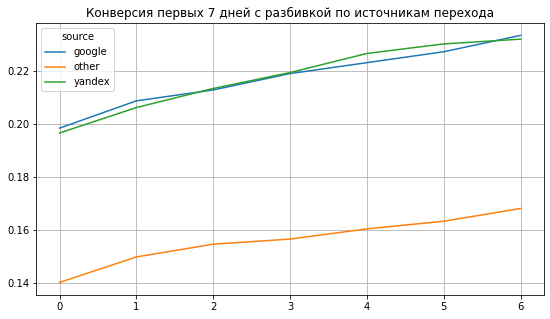

In [348]:
plt.figure(figsize=(20, 5))
report = conversion1.drop(columns=['cohort_size'])
report.T.plot(
    grid=True, xticks=list(report.columns.values), ax=plt.subplot(1, 2, 1)
)
plt.title('Конверсия первых 7 дней с разбивкой по источникам перехода')

plt.show()

**Вывод:** Согласно данным конверсии первых 7-ми дней использования приложения, конверсия ощутимо выше (на примерно 6%) у пользоваталей пришедших с яндекса или гугла. Совокупность других источников перехода менее эффективна с точки зрения выполнения целевого действия.

#### Retention Rate в разбивке по группам

<a id='i'></a>

In [349]:
#удержание по источнику перехода в приложение
retention_raw1, retention1 = get_retention(
    profiles, sessions, datetime(2019, 11, 4).date() , 7, dimensions=['source'])

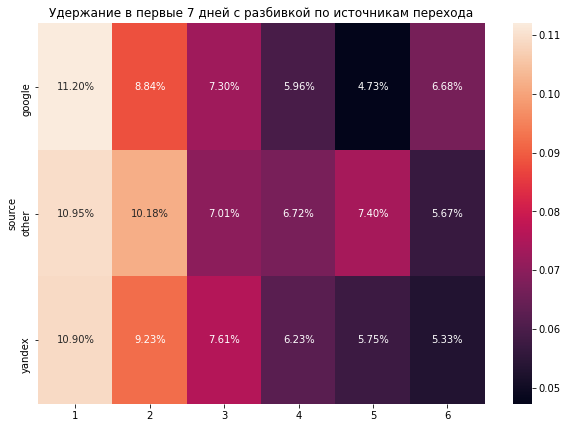

In [350]:
plt.figure(figsize=(10, 7)) 
sns.heatmap(retention1.drop(columns=['cohort_size', 0]), annot=True,   fmt='.2%')
plt.title('Удержание в первые 7 дней с разбивкой по источникам перехода')  
plt.show()

**Вывод:** Согласно данным об удержании пользователей, все источники показывают схожий процент возвращаемости. Чуть лучше показатели у пользоваталей пришедших с других ресурсов (other). Яндекс и гугл, как источники перехода, показывают себя менее эффективными с 4го дня

#### Время в приложении в разбивке по группам

<a id='k'></a>

In [351]:
#среднее время сессии в разбивке по источникам перехода
session_avgtime=sessions.groupby('source')['duration'].mean().reset_index().sort_values('duration', ascending=False)
session_avgtime['duration']=round(session_avgtime['duration']/60,2)

In [352]:
session_avgtime

,source,duration
2,yandex,16.54
0,google,15.48
1,other,13.11


In [353]:
#среднее суммарное время в приложении в разбивке по источникам перехода
sum_time=profiles.groupby('source')['duration'].mean().reset_index().sort_values('duration', ascending=False)
sum_time['duration']=round(sum_time['duration']/60,2)

In [354]:
sum_time

,source,duration
0,google,36.99
2,yandex,36.88
1,other,30.74


**Вывод:** Среднее время сессии по источникам перехода показывает схожие результаты с средним суммарным временем в приложении: яндекс и гугл показывают очень схожие показатели, делят между собой 1 и 2 места. Совокупность других истчников перехода уступает им обоим - среднее время сессии ниже примерно на 3 минуты, общее время ниже на примерно 5-6 минут.

#### Частота действий в разбивке по группам

<a id='l'></a>

In [355]:
#количество событий по датам, источник перехода - яндекс
yandex_plot=agg_data.query('source == "yandex"').groupby('event_dt')['event_name'].count().reset_index()

In [356]:
#количество событий по датам, источник перехода - гугл
google_plot=agg_data.query('source == "google"').groupby('event_dt')['event_name'].count().reset_index()

In [357]:
#количество событий по датам, источник перехода - остальные
other_plot=agg_data.query('source == "other"').groupby('event_dt')['event_name'].count().reset_index()

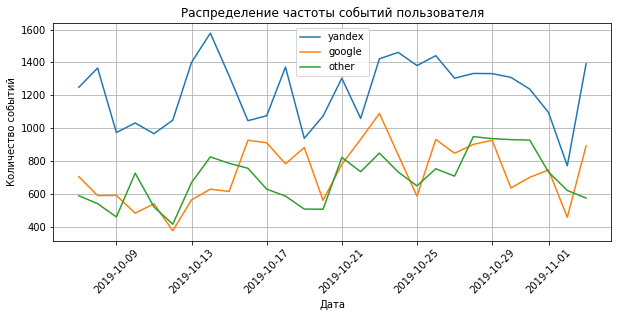

In [358]:
plt.figure(figsize = (10,4))
plt.plot('event_dt', 'event_name', data=yandex_plot, label='yandex')
plt.plot('event_dt', 'event_name', data=google_plot, label='google')
plt.plot('event_dt', 'event_name', data=other_plot, label='other')
plt.grid()
plt.legend()
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Количество событий')
plt.title('Распределение частоты событий пользователя')
plt.show()

**Вывод:** Пользователи пришедшие в приложение с яндекса выполняют суммарно больше событий по сравнению с другими источниками перехода. На графике показатели гугл и other примерно одинаковы почти на всем периоде исследуемых данных. Вероятно с точки зрения количества событий яндекс - более эффективный источник перехода.

#### Общий вывод по сегментации

Целевая аудитория — пользователи, которые приходят в приложение из Яндекса и Google. Они демонстрируют более высокую конверсию по сравнению с другими источниками перехода.\
\
Смежные аудитории — пользователи, перешедшие в приложение из других источников (other). Они показывают более низкую конверсию, но при этом демонстрируют схожую эффективность с точки зрения возвращаемости.\
\
Поскольку пользователи, пришедшие из этих источников, проводят больше времени в приложении и выполняют больше событий, вероятно имеет смысл развивать маркетинговые инструменты, работающие с этими источниками перехода. Также возможно стоит провести более детальный анализ целевой аудитории.\
\
Другие источники перехода (совокупность) менее эффективны с точки зрения конверсии, однако они также демонстрируют хорошую возвращаемость.

### Проверка гипотез

####  Проверка гипотезы 1 (yandex/google)

<a id='m'></a>

**H0:** Пользователи, установившие приложение по ссылке из yandex, и пользовали, установившие приложение по ссылке из google, демонстрируют одинаковую конверсию в целевое действие - просмотр контактов.\
**H1:** Пользователи, установившие приложение по ссылке из yandex, и пользовали, установившие приложение по ссылке из google, демонстрируют разную конверсию в целевое действие - просмотр контактов.

In [100]:
#количество пользователей совершивших целевое действие и общее кол-во по источникам перехода
target_source = (profiles
                 .pivot_table(index='source', 
                              values=['target', 'user_id'],
                              aggfunc={'user_id':'count','target':'sum'})
                )
target_source = target_source.rename(columns={'user_id' : 'total'})
target_source = target_source.query('source.isin(["yandex","google"])')

In [101]:
target_source

,target,total
source,,
google,275,1129
yandex,478,1934


In [102]:
#z_test
alpha = 0.05

stat, p_value = proportions_ztest(np.array([target_source.loc['google', 'target'], 
                                         target_source.loc['yandex', 'target']]), 
                               np.array([target_source.loc['google', 'total'], 
                                         target_source.loc['yandex', 'total']]))
print('{0:0.3f}'.format(p_value))

if (p_value < alpha): 
        print("Отвергаем нулевую гипотезу, между выборками есть статистически значимые различия")
else:
        print("Не получилось отвергнуть нулевую гипотезу, статистически значимых различий в выборках нет")

0.824
Не получилось отвергнуть нулевую гипотезу, статистически значимых различий в выборках нет


**Вывод. Гипотеза 1:**\
Выдвинутая гипотеза о разной конверсии пользователей из гугла и из яндекса не подтвердилась. Конверсии пользователей, установивших приложение по ссылке из yandex, и пользовалей, установивших приложение по ссылке из google, не имеют статистически значимых различий.

####  Проверка гипотезы 2 (morning/evening)

<a id='n'></a>

**H0:** Среднее время утренней и вечерней сессий пользователей не отличается.\
**H1:** Среднее время утренней и вечерней сессий пользователей отличается.

In [103]:
#инфо о длительности утренних сессий
session_morn=sessions.query('time_segment=="morning"')['duration']

In [104]:
#инфо о длительности вечерних сессий
session_evn=sessions.query('time_segment=="evening"')['duration']

In [105]:
#t-test
results = stats.ttest_ind(session_morn, 
                       session_evn, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу, между выборками есть статистически значимые различия")
else:
    print("Не получилось отвергнуть нулевую гипотезу, статистически значимых различий в выборках нет") 

p-значение: 0.12151731826396729
Не получилось отвергнуть нулевую гипотезу, статистически значимых различий в выборках нет


**Вывод. Гипотеза 2:**\
Выдвинутая гипотеза о разном среднем времени утренней и вечерней сессии не подтвердилась. Среднее время сессии с 6 утра до 12 дня и среднее время сессии с 18 вечера до 22 ночи не имеет статистически значимых различий.

### Общий вывод

<a id='o'></a>

В датасетах содержатся **данные о событиях, совершенных в мобильном приложении "Ненужные вещи"**, за период 28 дней **с 7 октября по 3 ноября 2019 года.**. Вся информация заполнена автоматически. Первый датасет содержит информацию о действиях, выполненных разными пользователями за анализируемый период. Второй - источники перехода в приложение для каждого уникального пользователя.\
\
Общий анализ данных показал, что в датасетах представлены данные о **9895 сессиях** от **4293 уникальных пользователей**.\
\
За весь рассматриваемый период количество совершенных пользователями событий по категориям колеблется от ~200 до ~40 000 событий за 28 рассматриваемых дней.**Наиболее популярное — просмотр рекомендованных объявлений.**\
**Целевое действие show_contacts входит в топ-4, однако, было совершено в 10 раз реже просмотра рекомендованных объявлений**.\
**Наименее популярные события - вариации search (6, 2 и 7) и звонок продавцу**. Большая часть пользователей смотрит рекомендации, а не приходит за чем-то конкретным.Возможно стоит уделить особое внимание разработке алгоритма подбора товаров, увеличить точность рекомендаций. Также обратить внимание на реализацию функционала contacts call, возможно пользователи предпочитают связываться с продавцами через другие каналы коммуникации.\
\
Закономерностей в росте и падении выполненного количества событий по имеющимся данным обнаружено не было. Возможно необходим более детальный анализ, поскольку график не стабилен.\
\
**1 сессия, в среднем, включает в себя от 6 до 10 действий**.\
\
Средние показатели **продолжительности сессий варьируются от 6 минут до 15 минут**.\
В датасете присуствуют, как аномально высокие значения, так и нулевые сессии. **Нулевые сессии составляют примерно 19 % от общего количества сессий**. *Лидеры по проценту нулевых сессий - действия search_1 и photos_show*. Вероятно отсутствуют результаты по введенному поисковому запросу, отсутствуют фотографии товара. Имеет смысл проверить данные типы событий на наличие недостатков в реализации.\
\
Что касается общего времени, за 28 дней большинство пользователей провели в приложении суммарно до 50 минут. **Среднее суммарное время**, проведённое пользователями в приложении, составляет **около 35 минут**, а **медианное** ниже — **примерно 16 минут** *(указывает на большое количество аномально высоких значений)*.\
Разница во времени использования может быть связана, как с удобством функционала, так и с проблемами использования. Рекомендуется более детальный анализ.\
**Важное: Пользователи, совершившие целевое действие - показ контактов - хотя бы 1 раз, в среднем проводят в приложении больше времени**.\
\
Схожая ситуация с количеством сессий:\
**Пользователи, совершившие целевое действие, показывают лучшие результаты по количеству сессий.** В среднем они совершают на одну сессию больше, чем остальные. Вероятно удачный опыт покупки мотивирует к дальнейшему использованию.\
**Среднее количество сессий на пользователя составляет примерно 2-3**. Среднее **количество событий на сессию — около 8**.\
Ожидаемо, чаще всего пользователи *предпочитают пользоваться приложением днём и вечером*, тогда как ночью активность снижается. Важно отметить, что *средние количество действий и продолжительности сессии меняются по времени суток незначительно*.\
\
Анализ удержания пользователей показывает, что **совершившие целевое действие, гораздо охотнее возвращаются в приложение**. Вероятно стоит обратить внимание на качество обслуживания клиентов после совершения сделки, чтобы повысить их удовлетворённость и вероятность повторного использования приложения.\
\
**Общая конверсия по 7-ми дням около 19-20%**.\
\
Удержание, конверсия, время в приложении и частота действий были также найдены **для групп, сегментированных по источнику перехода: Яндекс, Гугл и группа остальных источников перехода в совокупности**.

* Конверсия выше у пользоваталей пришедших с Яндекса или Гугла.
* Удержание схоже  для все групп. Чуть лучше показатели у остальных источников.
* По времени в приложении (сессия и суммарное) Яндекс и Гугл показывают очень схожие высокие показатели.
* По количеству совершаемых событий лидирует Яндекс.
**Целевая аудитория — пользователи, которые приходят в приложение из Яндекса и Google**. Они демонстрируют более высокую конверсию по сравнению с другими источниками перехода. По итогам анализа рекомендуется развивать маркетинговые инструменты, работающие с этими источниками перехода. Также возможно стоит провести более детальный анализ целевой аудитории.\
\
В ходе анализа также были проверены **2 гипотезы**:
1. Пользователи, установившие приложение по ссылке из yandex, и пользовали, установившие приложение по ссылке из google, демонстрируют разную конверсию в целевое действие - просмотр контактов.
2. Среднее время утренней и вечерней сессий пользователей отличается.
**Обе гипотезы не подтвердились**, различия обеих групп по обеим параметрам нельзя назвать статистически значимыми.